# Problem Set #7 Machine Learning

In [55]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Decision Tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import graphviz
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm, datasets
from scipy.stats import uniform as sp_uniform

from sklearn.neural_network import MLPClassifier

# Problem 1

## Problem 1 (a)

In [3]:
drink = pd.read_csv('data/strongdrink.txt')
drink.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Split dataset into training and testing

In [88]:
X = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
y = drink['cultivar'].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25, random_state=20)

### Maximum likelihood estimation on Multinomial logistic regression 

#### Coefficients and Intercepts for j=1 and j=2

In [89]:
Mlogit = LogisticRegression(random_state=10, solver='newton-cg', multi_class='multinomial')
Mlogit.fit(X_train, y_train)

# Following lines of code motivated by:
# https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
j1_list = np.append(Mlogit.intercept_[0],Mlogit.coef_[0])
j2_list = np.append(Mlogit.intercept_[1],Mlogit.coef_[1])
pd.DataFrame({"j = 1": j1_list,
              "j = 2": j2_list},
               index=[r"$\beta_0$",r"$\beta_1$",r"$\beta_2$",r"$\beta_3$",r"$\beta_4$"],)

,j = 1,j = 2
$\beta_0$,-24.010571,22.802707
$\beta_1$,1.700370,-1.468065
$\beta_2$,-0.265602,-0.333055
$\beta_3$,1.223892,0.664017
$\beta_4$,0.022762,-0.922714


### Classification Report

In [90]:
y_pred = Mlogit.predict(X_test)

In [91]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[13,  0,  0],
       [ 2, 19,  0],
       [ 0,  0, 10]])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



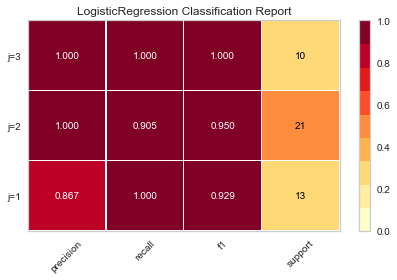

In [93]:
classes = ['j=1', 'j=2', 'j=3']
viz = ClassificationReport(LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial'), classes=classes, support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

Following definitions are based on:
https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html


- Precision is "the ability of classifier not to label an instance positive that is actually negative." Therefore, for all instances classified positive, about 86% was correct for j=1, 100% was correct for j=2, 100% was correct for j=3.

- Recall is "the ability of classifier to find all positive instances." Therefore, for all instances that were actually positive, 100% was classified correctly for j=1, about 90% was classified correctly for j=2, 100% was classified correctly for j=3.

- F1 score is "the weighted harmonic mean of precision and recall such that the best score is 1.0." The score illustrates the accuracy of classifier in classifying data points in that particular class compared to all other classes. Based on the f1 score, model seems to be best at predicting j=2. 

- Support is "the number of actual occurences of class in the specified dataset." Therefore, we had the most data sets for j=2 classification.

In conclusion, the model is best at predicting j=2 category (based on f1 score). This seems to be the class with the most observations (based on support). 


### Error Rates

In [62]:
pd.DataFrame({"j=1": 1 - 0.87,
              "j=2": 1 - 1,
              "j=3": 1 - 1},
             index = ['error rates'])

,j=1,j=2,j=3
error rates,0.13,0,0


### MSE

In [48]:
print('Validation set MSE = ', mean_squared_error(y_test, y_pred))

Validation set MSE =  0.045454545454545456


## Problem 1 (b): Leave-one-out cross validation

In [83]:
Xvars = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = drink['cultivar'].values

N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    Mlogit = LogisticRegression(random_state=20, solver='newton-cg', multi_class='multinomial')
    Mlogit.fit(X_train, y_train)
    y_pred = Mlogit.predict(X_test)
    
    MSE_vec[test_index] = mean_squared_error(y_test, y_pred)
    y_test_vec[test_index] = y_test
    y_pred_vec[test_index] = y_pred
    #print('MSE for test set', test_index, ' is', MSE_vec[test_index])

### Classification Report

In [84]:
print(classification_report(y_test_vec, y_pred_vec))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



### Error Rates

In [61]:
pd.DataFrame({"j=1": 1 - 0.9,
              "j=2": 1 - 0.91,
              "j=3": 1 - 0.96},
             index = ['error rates'])

,j=1,j=2,j=3
error rates,0.1,0.09,0.04


Compared to error rates from part (a), error rates in part (b) is higher for j=1 and lower for j=2 and j=3.

### MSE

In [63]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo)
print('test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.09659090909090909
test estimate MSE standard err= 0.39426250589387657


## Problem 1 (c): K-fold Cross Validation

In [94]:
Xvars = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = drink['cultivar'].values

k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

N_loo = Xvars.shape[0]
MSE_vec_kf = np.zeros(k)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    Mlogit = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
    Mlogit.fit(X_train, y_train)
    y_pred = Mlogit.predict(X_test)

    MSE_vec_kf[k_ind] = mean_squared_error(y_test, y_pred)
    y_test_vec[test_index] = y_test
    y_pred_vec[test_index] = y_pred
    # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

### Classification Report

In [173]:
print(classification_report(y_test_vec, y_pred_vec))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       196
         1.0       0.89      0.94      0.91       196

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



### Error Rates

In [96]:
pd.DataFrame({"j=1": 1 - 0.87,
              "j=2": 1 - 0.91,
              "j=3": 1 - 0.96},
             index = ['error rates'])

,j=1,j=2,j=3
error rates,0.13,0.09,0.04


Compared to error rates from part (a) and (b), error rates in part (c) seems to be the max error rate between part (a) and part (b). 

### MSE

In [97]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf)
print('test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.10795454545454546
test estimate MSE standard err= 0.07429941381035239


### Experiment with K of K-Fold Cross Validation

In [239]:
Xvars = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = drink['cultivar'].values


MSE_vec = np.zeros(drink.shape[0])
for k in range(2, drink.shape[0]):
    kf = KFold(n_splits=k, random_state=10, shuffle=True)
    kf.get_n_splits(Xvars)

    N_loo = Xvars.shape[0]
    MSE_vec_kf = np.zeros(k)
    y_test_vec = np.zeros(N_loo)
    y_pred_vec = np.zeros(N_loo)

    k_ind = int(0)
    for train_index, test_index in kf.split(Xvars):
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print('k index=', k_ind)
        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvars[train_index], yvars[test_index]
        Mlogit = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
        Mlogit.fit(X_train, y_train)
        y_pred = Mlogit.predict(X_test)

        MSE_vec_kf[k_ind] = mean_squared_error(y_test, y_pred)
        y_test_vec[test_index] = y_test
        y_pred_vec[test_index] = y_pred
        # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
        k_ind += 1
        
    MSE_kf = MSE_vec_kf.mean()
    MSE_kf_std = MSE_vec_kf.std()
    MSE_vec[k] = MSE_kf

Text(0, 0.5, 'MSE')

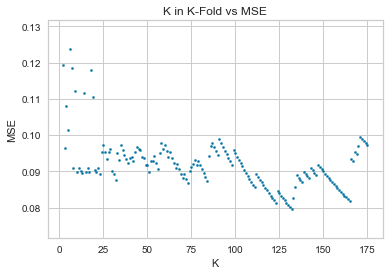

In [251]:
domain = np.linspace(2, drink.shape[0] - 1, drink.shape[0] - 2)
plt.scatter(domain, MSE_vec[2:], s=5)
plt.title("K in K-Fold vs MSE")
plt.xlabel("K")
plt.ylabel("MSE")

MSE is the sum of bias and variance. Therefore, in order to reduce MSE, we need to balance out bias and variance. Usually, bias and variance have an inverse relationship. In other words, high bias tend to cause low variance and vice versa. When we have small K, we expect low bias and high variance. Since we are using a lot of training data to construct our model, we get low bias. However, we have high variance when predicting y with our test data based on the model. This is because using a lot of training data to construct model could lead to over-fitting. In contrast, when we have a large K, we expect high variance and low variance. Since we are using small training data to contruct our model, we will have high bias. However, since we used only small training data to construct model, we expect less variance in predicting y from testing data. 

# Problem 2

## Problem 2 (a)

In [4]:
biden = pd.read_csv('data/biden.csv')
biden.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


### Split dataset into training and testing

In [5]:
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
y = biden['biden'].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state=25)

### Decision Tree Construction

In [6]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

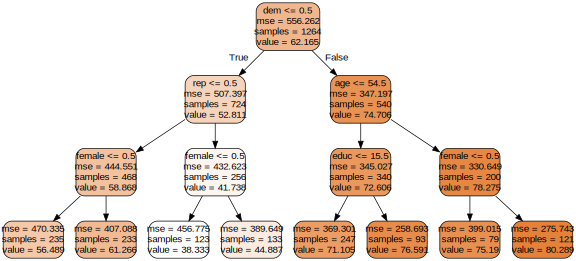

In [7]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=['female', 'age', 'educ', 'dem', 'rep'],
    class_names=['biden'],
    rounded=True,
    filled=True,
)

pydot_graph = pydotplus.graph_from_dot_data(biden_tree_viz)
pydot_graph.write_png('biden_tree_viz')
pydot_graph.set_size('"8,8!"')

gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

From the visualization, we see that female democrats who are older than 54.5 years of age have the biggest biden. In contrast, male republicans have the smallest biden. 

### MSE

In [9]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 396.1937146321307


## Problem 2 (b)

In [11]:
# specify parameters and distributions to sample from
param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

# Run randomized hyperparameter search
random_search1 = \
    RandomizedSearchCV(biden_tree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search1.fit(X, y)  
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1 (Optimal Tuning Parameter Values) =', random_search1.best_params_)
print('RandBestScore1 (MSE) =', -random_search1.best_score_)

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
RandBestParams1 (Optimal Tuning Parameter Values) = {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1 (MSE) = 401.6903602232667


## Problem 2 (c): Random Forest Regression Model

In [209]:
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20), 
               'max_features': sp_randint(1, 5)}

biden_random_forest = RandomForestRegressor(random_state=25)

random_search2 = RandomizedSearchCV(biden_random_forest, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(X, y)
print('RandBestEstimator2 =', random_search2.best_estimator_)
print('RandBestParams2 (Optimal Tuning Parameter Values) =', random_search2.best_params_)
print('RandBestScore2 (MSE) =', -random_search2.best_score_)

RandBestEstimator2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=17, min_samples_split=13,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=25, verbose=0,
                      warm_start=False)
RandBestParams2 (Optimal Tuning Parameter Values) = {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore2 (MSE) = 397.0681090117028


# Problem 3

In [18]:
auto = pd.read_csv('data/auto.csv', na_values='?')  # '?' exist for 'hpwr' column
auto.columns = ['mpg', 'cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn','name']
auto['mpg_high'] = (auto['mpg'] >= auto['mpg'].median()).astype('int')
auto.dropna(inplace = True)
auto["orgn1"] = np.where(auto["orgn"]==1,1,0)
auto["orgn2"] = np.where(auto["orgn"]==2,1,0)
auto['const'] = 1
auto.head()

,mpg,cyl,displ,hpwr,wgt,accl,yr,orgn,name,mpg_high,orgn1,orgn2,const
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,1,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,1,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,1,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,1,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,1,0,1


In [19]:
# have to make sure all relevant variables are the correct type:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 13 columns):
mpg         392 non-null float64
cyl         392 non-null int64
displ       392 non-null float64
hpwr        392 non-null float64
wgt         392 non-null int64
accl        392 non-null float64
yr          392 non-null int64
orgn        392 non-null int64
name        392 non-null object
mpg_high    392 non-null int64
orgn1       392 non-null int64
orgn2       392 non-null int64
const       392 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 42.9+ KB


## Problem 3 (a)

In [20]:
Xvars = auto[['const', 'cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn1', 'orgn2']].values
yvars = auto['mpg_high'].values

k = 4
kf = KFold(n_splits=k, random_state=25, shuffle=True)
kf.get_n_splits(Xvars)

N_loo = Xvars.shape[0]
MSE_vec_kf = np.zeros(k)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)

    MSE_vec_kf[k_ind] = mean_squared_error(y_test, y_pred)
    y_test_vec[test_index] = y_test
    y_pred_vec[test_index] = y_pred
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE for test set 0  is 0.1326530612244898
MSE for test set 1  is 0.08163265306122448
MSE for test set 2  is 0.07142857142857142
MSE for test set 3  is 0.07142857142857142


### Classification Report

In [217]:
print(classification_report(y_test_vec, y_pred_vec))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       196
         1.0       0.89      0.94      0.91       196

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



### Error Rates

In [218]:
pd.DataFrame({"mpg_high = 0": 1 - 0.94,
              "mpg_high = 1": 1 - 0.89},
             index = ['error rates'])

,mpg_high = 0,mpg_high = 1
error rates,0.06,0.11


### MSE

In [219]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf)
print('test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.08928571428571427
test estimate MSE standard err= 0.025382332579250516


## Problem 3 (b)

In [21]:
# Random Forest already have constant term ???
X = auto[['cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn1', 'orgn2']].values
y = auto['mpg_high'].values

param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20), 
               'max_features': sp_randint(1, 8)}

auto_random_forest = RandomForestRegressor(random_state=25)

random_search3 = RandomizedSearchCV(auto_random_forest, param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('RandBestEstimator3 =', random_search3.best_estimator_)
print('RandBestParams3 (Optimal Tuning Parameter Values) =', random_search3.best_params_)
print('RandBestScore3 (MSE) =', -random_search3.best_score_)

RandBestEstimator3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=25, verbose=0,
                      warm_start=False)
RandBestParams3 (Optimal Tuning Parameter Values) = {'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
RandBestScore3 (MSE) = 0.0932354521565113


## Problem 3 (c)

In [22]:
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

svc = svm.SVC(kernel='rbf')

random_search4 = RandomizedSearchCV(svc, param_distributions=param_dist4,
                                    n_iter=100, n_jobs=-1, cv=4, random_state=25,
                                    scoring='neg_mean_squared_error')

random_search4.fit(X, y)
print('RandBestEstimator4 =', random_search4.best_estimator_)
print('RandBestParams4 (Optimal Tuning Parameter Values) =', random_search4.best_params_)
print('RandBestScore4 (MSE) =', -random_search4.best_score_)

RandBestEstimator4 = SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)
RandBestParams4 (Optimal Tuning Parameter Values) = {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
RandBestScore4 (MSE) = 0.11989795918367346


## Problem 3 (d)

Based on the MSE, the best predictor of mpg_high is the Random Forest Classifier because it has the lowest MSE.

# Problem 4 

In [80]:
drink = pd.read_csv('data/strongdrink.txt', na_values='?') 
drink.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Problem 4 (a)

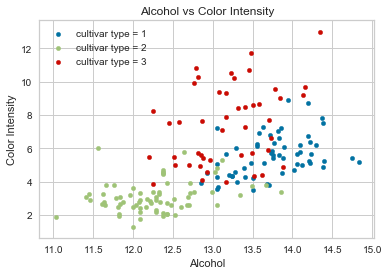

In [82]:
for i in [1,2,3]:
    df = drink[drink['cultivar']==i]
    plt.scatter(df['alco'], df['color_int'], s=20, label='cultivar type = {}'.format(i))

plt.legend()
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("Alcohol vs Color Intensity")
plt.show()

In [104]:
X = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
y = drink['cultivar'].values

## Problem 4 (b)

In [105]:
param_dist1 = {'penalty': ['l1', 'l2'], 
               'C': sp_uniform(0.1, 10.0)}

Mlogit = LogisticRegression(random_state=25)

random_search1 = RandomizedSearchCV(Mlogit, param_dist1, 
                                    n_iter=200, n_jobs=-1, cv=5, 
                                    random_state=25, scoring='neg_mean_squared_error')

random_search1.fit(X, y)
print('RandBestEstimator1 =', random_search1.best_estimator_)
print('RandBestParams1 (Optimal Tuning Parameter Values) =', random_search1.best_params_)
print('RandBestScore1 (MSE) =', -random_search1.best_score_)

RandBestEstimator1 = LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
RandBestParams1 (Optimal Tuning Parameter Values) = {'C': 2.665871587495725, 'penalty': 'l1'}
RandBestScore1 (MSE) = 0.11931818181818182


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Problem 4 (c)

In [106]:
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

random_forest = RandomForestClassifier(random_state=25)

random_search2 = RandomizedSearchCV(random_forest, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(X, y)
print('RandBestEstimator2 =', random_search2.best_estimator_)
print('RandBestParams2 (Optimal Tuning Parameter Values) =', random_search2.best_params_)
print('RandBestScore2 (MSE) =', -random_search2.best_score_)

RandBestEstimator2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)
RandBestParams2 (Optimal Tuning Parameter Values) = {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
RandBestScore2 (MSE) = 0.14772727272727273


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Problem 4 (d)

In [107]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

svc = svm.SVC(kernel='rbf')

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('RandBestEstimator3 =', random_search3.best_estimator_)
print('RandBestParams3 (Optimal Tuning Parameter Values) =', random_search3.best_params_)
print('RandBestScore3 (MSE) =', -random_search3.best_score_)

RandBestEstimator3 = SVC(C=9.58835943424229, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
RandBestParams3 (Optimal Tuning Parameter Values) = {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
RandBestScore3 (MSE) = 0.13636363636363635


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Problem 4 (e)

In [108]:
mlp = MLPClassifier(random_state=25)

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')

random_search4.fit(X, y)
print('RandBestEstimator4 =', random_search4.best_estimator_)
print('RandBestParams4 (Optimal Tuning Parameter Values) =', random_search4.best_params_)
print('RandBestScore4 (MSE) =', -random_search4.best_score_)

RandBestEstimator4 = MLPClassifier(activation='relu', alpha=2.158912119744818, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=68, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=25, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
RandBestParams4 (Optimal Tuning Parameter Values) = {'activation': 'relu', 'alpha': 2.158912119744818, 'hidden_layer_sizes': 68}
RandBestScore4 (MSE) = 0.19318181818181818


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Problem 4 (f)

Based on the MSE, the best predictor of cultivar is the multinomial logistic regression because it has the lowest MSE.